# Lab 1

In this lab exercise, you will look at applying edge detectors to images and comparing two different methods. You will also learn how to write a function in Python and evaluate the difference when using an approximation for the calculation of a parameter.

At this stage, we will assume that you are able to use Python, and understand its basic use. **You are asked to write a short (no more than 2 pages) report of your work**, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback.

### Introduction

First we will cover some basics regarding Python and Image Manipulation.

The first step is importing the required packages. In this assignment we will be using [scikit-image](https://scikit-image.org/), [MatPlotLib](https://matplotlib.org/) and [Numpy](https://numpy.org/). We have also provided helper functions for displaying the images inline. Check that your environment is configured correctly by running the section below. If this section fails, refer to the README on how to set up the environment.

In [1]:
# Imports
import skimage
import scipy
from matplotlib import pyplot as plt
import numpy as np
from utils import show_binary_image

In order to load images we use the [imread](https://scikit-image.org/docs/stable/user_guide/getting_started.html) function which is part of scikit-image. Images can be displayed using the show_rgb_image helper function. Read through this function to understand how it works. We can also see the raw image data by printing the variable using ```print```. As can be seen, by default in Skimage image pixels are represented as bytes with a range of 0-255. 

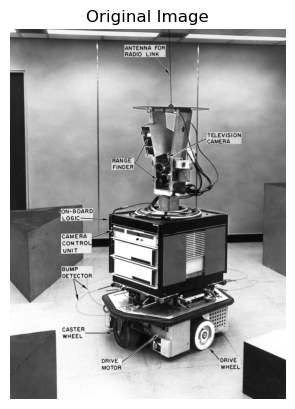

Shakey raw values [[254 254 254 ... 131 122 122]
 [254 254 254 ... 120 113 113]
 [254 254 254 ... 121 113 113]
 ...
 [ 83  81  78 ...  39  39  39]
 [ 83  81  78 ...  41  41  41]
 [ 83  81  78 ...  43  43  43]]


In [2]:

# Read image
shakey = skimage.io.imread('shakey.jpg')[:,:,0] #Extract the Green Channel

# Display the image
plt.imshow(shakey,cmap="gray")
plt.title("Original Image")
plt.axis('off')
plt.show()


print("Shakey raw values", shakey)

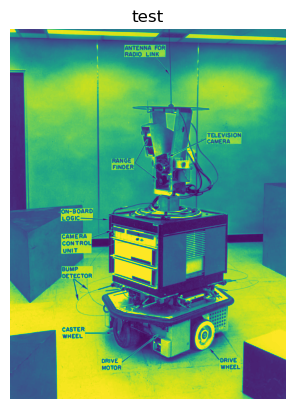

In [3]:
plt.imshow(shakey)
plt.title('test')
plt.axis('off')
plt.show()

In scikit we perform convolution using the convolve2d function. Kernels can be defined as numpy arrays as seen below. A detailed guide to this function can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In [4]:
sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

print(sobel_y)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


Boolean Thesholded Values:
[[ True  True False ... False  True  True]
 [ True  True False ... False  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True False ... False  True  True]
 [ True  True False ... False False False]]
Boolean Thesholded Image:


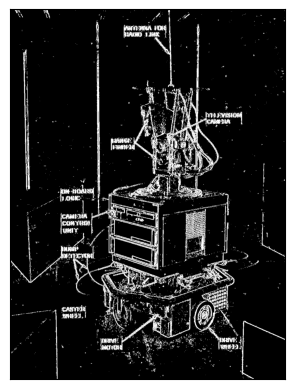

In [5]:
# Applying a filter
# We convert the output type to floats in order to preserve negative gradients
# We can also threshold the image using the > operator
threshold_shakey_sobel_x = abs(scipy.signal.convolve2d(shakey, sobel_x))>50

print("Boolean Thesholded Values:")
print(threshold_shakey_sobel_x)

# Here we use the binary helper function as our image is now binary
print("Boolean Thesholded Image:")
show_binary_image(threshold_shakey_sobel_x)


# Task1

Combine the two resulting arrays (shakey_sobel_x and shakey_sobel_y) using Pythagoras theorem. To do this you will have to make your own function, such that:

```m = magnitude(x,y)```

Now display the resulting image using

```show_rgb_image(m)```

You can also display this edge image after thresholding it,

```show_binary_image(m>40)```

Create several of these with different thresholds.

**QUESTION 1: What do you notice regarding the effect of changing the threshold? State both your observations and the reasons for the observations. Show your code, results and answer in the report.**

[[ 254.  254.    0. ...    9.  122.  122.]
 [ 762.  762.    0. ...   25.  357.  357.]
 [1016. 1016.    0. ...   31.  461.  461.]
 ...
 [ 332.  324.   20. ...    0.  164.  164.]
 [ 249.  243.   15. ...    0.  127.  127.]
 [  83.   81.    5. ...    0.   43.   43.]]


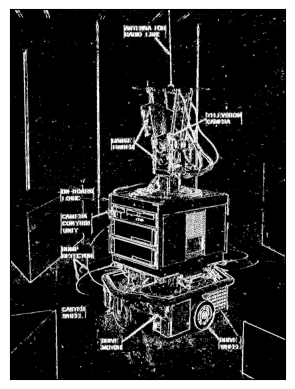

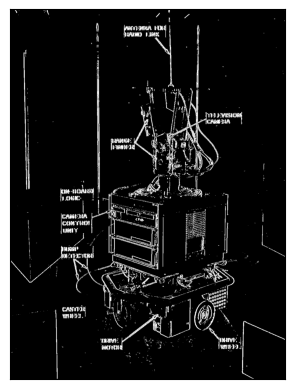

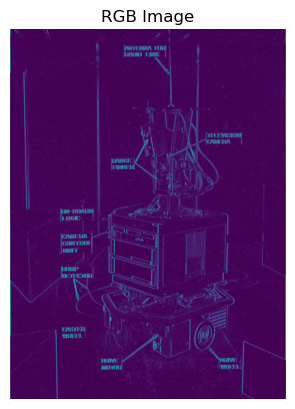

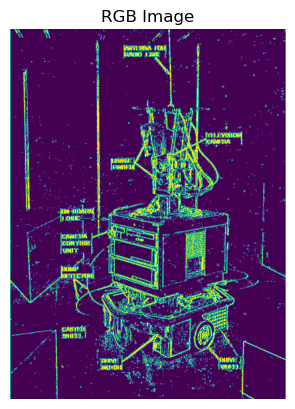

In [7]:
# Complete Task 1 here
from utils import show_rgb_image
def magnitude(x, y):
    return np.sqrt(x**2, y**2)
shakey_sobel_x = scipy.signal.convolve2d(shakey, sobel_x)
shakey_sobel_y = scipy.signal.convolve2d(shakey, sobel_y)
m = magnitude(np.array(shakey_sobel_x, dtype=float), np.array(shakey_sobel_y, dtype=float))
print(m)
show_binary_image(m>40)
show_binary_image(m>100)
show_rgb_image(m)
show_rgb_image(m>40)



# Task 2

Repeat your previous exercise, with the Roberts operator.

The Roberts operator is defined as:

$$
Gx = 
\begin{matrix}
+1 & 0 \\
0 & -1 
\end{matrix}
$$

$$
Gy = 
\begin{matrix}
0 & +1 \\
-1 & 0 
\end{matrix}
$$

**QUESTION 2: What do you notice regarding the difference between Sobel and Roberts? State both your observations and the reasons for the observations.**

[[254. 254. 254. ... 122. 122.   0.]
 [254.   0.   0. ...  18.   9. 122.]
 [254.   0.   0. ...   7.   0. 113.]
 ...
 [ 83.   2.   3. ...   2.   2.  39.]
 [ 83.   2.   3. ...   2.   2.  41.]
 [  0.  83.  81. ...  43.  43.  43.]]


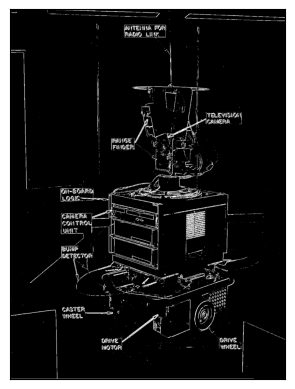

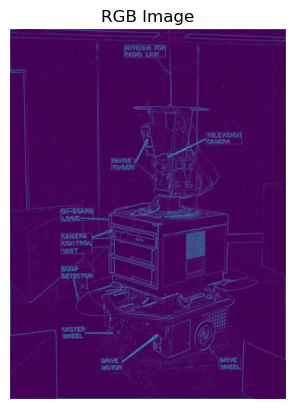

In [26]:
# Complete Task 2 here
roberts_x = np.array(
    [[1,0],
     [0,-1]])

roberts_y = np.array(
    [[0,1],
     [-1,0]])

shakey_roberts_x = scipy.signal.convolve2d(shakey, roberts_x)
shakey_roberts_y = scipy.signal.convolve2d(shakey, roberts_y)
m = magnitude(np.array(shakey_roberts_x, dtype=float), np.array(shakey_roberts_y, dtype=float))
print(m)
show_binary_image(m>40)
show_rgb_image(m)


# Task 3

You now need to write a new function, that rather than taking the magnitude of the gradients, it takes the absolute value of |Gx|+|Gy|. This is an approximation to the magnitude.

**QUESTION 3: What do you notice regarding the difference between magnitude and absolute when calculating the edge? State both your observations and the reasons for the observations.**

[[254. 508. 508. ... 253. 244. 122.]
 [508.   0.   0. ...  20.  18. 235.]
 [508.   0.   0. ...  15.   0. 226.]
 ...
 [166.   4.   6. ...   4.   4.  80.]
 [166.   4.   6. ...   4.   4.  84.]
 [ 83. 164. 159. ...  86.  86.  43.]]


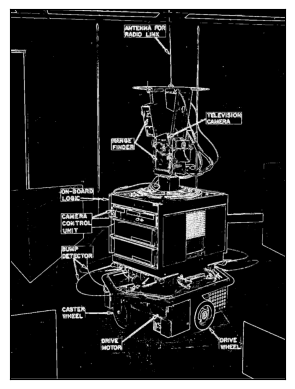

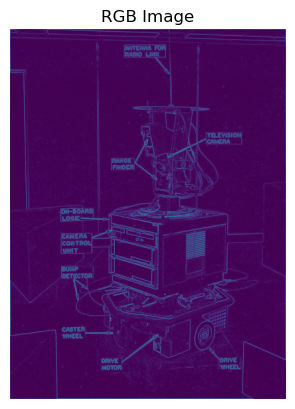

In [27]:
# Complete Task 3 here
def approx_magnitude(x, y):
    return np.abs(x) + np.abs(y)

m = approx_magnitude(np.array(shakey_roberts_x, dtype=float), np.array(shakey_roberts_y, dtype=float))
print(m)
show_binary_image(m>40)
show_rgb_image(m)